In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import log_loss, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier


names = ["Nearest Neighbors", 
         "Decision Tree",
         "Random Forest", 
         "AdaBoost", 
         "Naive Bayes", 
         "Extra Trees",
         "XGBoost"]
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    ExtraTreesClassifier(n_estimators=1000),
    xgb.XGBClassifier()]

idea cach hoat dong vi du voi 5 file quy trinh xu ly qua tung file

Predicted label for the new file: malicious


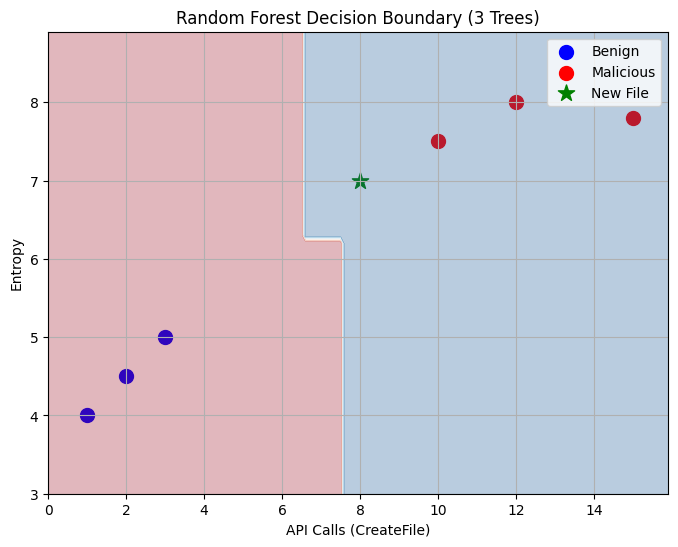

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Dataset
X_train = np.array([
    [2, 4.5], [3, 5.0], [1, 4.0],  # benign
    [10, 7.5], [12, 8.0], [15, 7.8]  # malicious
])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_new = np.array([[8, 7.0]])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_new_scaled = scaler.transform(X_new)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
prediction = rf.predict(X_new_scaled)
print(f"Predicted label for the new file: {'malicious' if prediction[0] == 1 else 'benign'}")

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
# Plot benign and malicious files
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Benign', s=100)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Malicious', s=100)
# Plot new file
plt.scatter(X_new[0, 0], X_new[0, 1], color='green', label='New File', s=150, marker='*')

# Create a mesh grid to plot decision boundary
h = 0.1
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

plt.xlabel('API Calls (CreateFile)')
plt.ylabel('Entropy')
plt.title('Random Forest Decision Boundary (3 Trees)')
plt.legend()
plt.grid(True)
plt.show()

Predicted label for the new file: malicious


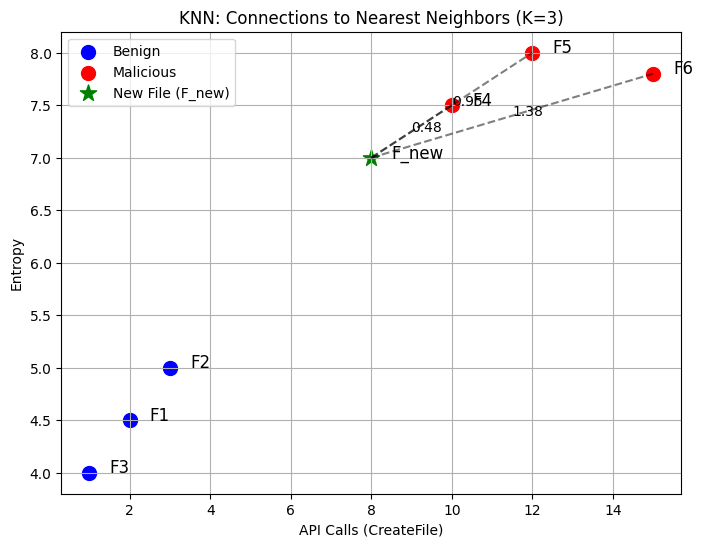

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Dataset
X_train = np.array([
    [2, 4.5], [3, 5.0], [1, 4.0],  # benign
    [10, 7.5], [12, 8.0], [15, 7.8]  # malicious
])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_new = np.array([[8, 7.0]])
file_names = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_new_scaled = scaler.transform(X_new)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict
prediction = knn.predict(X_new_scaled)
print(f"Predicted label for the new file: {'malicious' if prediction[0] == 1 else 'benign'}")

# Get the 3 nearest neighbors
distances, indices = knn.kneighbors(X_new_scaled, n_neighbors=3)

# Visualize
plt.figure(figsize=(8, 6))
# Plot benign and malicious files
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Benign', s=100)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Malicious', s=100)
# Plot new file
plt.scatter(X_new[0, 0], X_new[0, 1], color='green', label='New File (F_new)', s=150, marker='*')

# Draw lines to the 3 nearest neighbors
for i, idx in enumerate(indices[0]):
    plt.plot([X_new[0, 0], X_train[idx, 0]], [X_new[0, 1], X_train[idx, 1]], 
             'k--', alpha=0.5)
    # Annotate distances
    mid_x = (X_new[0, 0] + X_train[idx, 0]) / 2
    mid_y = (X_new[0, 1] + X_train[idx, 1]) / 2
    plt.text(mid_x, mid_y, f'{distances[0][i]:.2f}', color='black', fontsize=10)

# Annotate file names
for i, name in enumerate(file_names):
    plt.text(X_train[i, 0] + 0.5, X_train[i, 1], name, fontsize=12)
plt.text(X_new[0, 0] + 0.5, X_new[0, 1], 'F_new', fontsize=12)

plt.xlabel('API Calls (CreateFile)')
plt.ylabel('Entropy')
plt.title('KNN: Connections to Nearest Neighbors (K=3)')
plt.legend()
plt.grid(True)
plt.show()

Final prediction for the new file: malicious
Predictions from each tree: ['malicious', 'malicious', 'malicious']


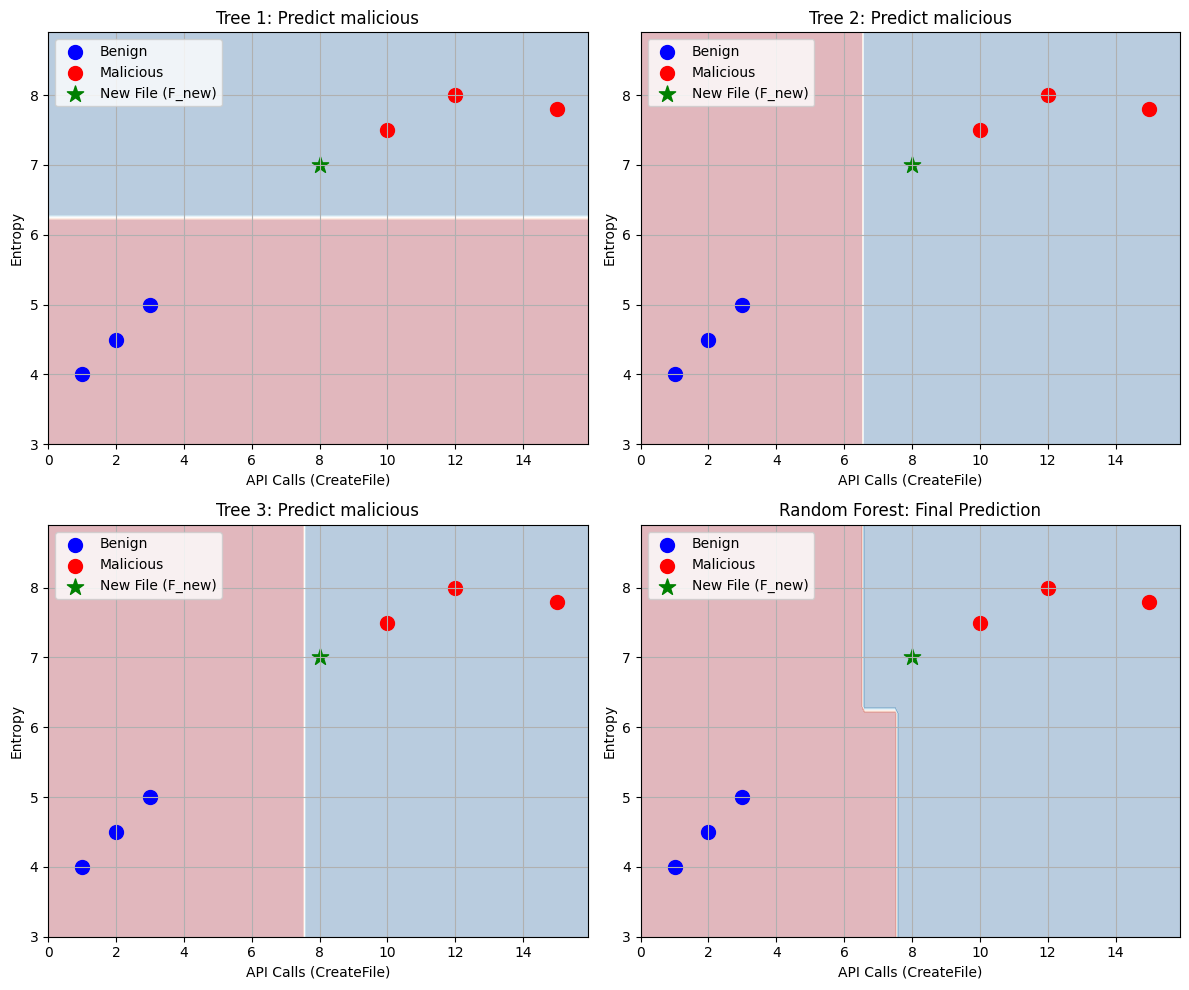

C:\Users\Windows\AppData\Local\Temp\ipykernel_1968\1163781720.py:73: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  votes = np.bincount(tree_predictions)


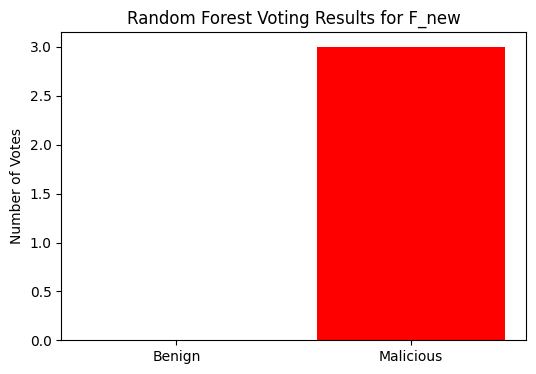

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Dataset
X_train = np.array([
    [2, 4.5], [3, 5.0], [1, 4.0],  # benign
    [10, 7.5], [12, 8.0], [15, 7.8]  # malicious
])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_new = np.array([[8, 7.0]])
file_names = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_new_scaled = scaler.transform(X_new)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
prediction = rf.predict(X_new_scaled)
print(f"Final prediction for the new file: {'malicious' if prediction[0] == 1 else 'benign'}")

# Get predictions from each tree
tree_predictions = [tree.predict(X_new_scaled)[0] for tree in rf.estimators_]
print("Predictions from each tree:", ['malicious' if pred == 1 else 'benign' for pred in tree_predictions])

# Visualize individual tree decision boundaries and combined boundary
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Plot for each tree
h = 0.1
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, tree in enumerate(rf.estimators_):
    Z = tree.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    axes[i].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Benign', s=100)
    axes[i].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Malicious', s=100)
    axes[i].scatter(X_new[0, 0], X_new[0, 1], color='green', label='New File (F_new)', s=150, marker='*')
    axes[i].set_title(f'Tree {i+1}: Predict {"malicious" if tree_predictions[i] == 1 else "benign"}')
    axes[i].set_xlabel('API Calls (CreateFile)')
    axes[i].set_ylabel('Entropy')
    axes[i].legend()
    axes[i].grid(True)

# Plot combined Random Forest decision boundary
Z = rf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
axes[3].contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
axes[3].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Benign', s=100)
axes[3].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Malicious', s=100)
axes[3].scatter(X_new[0, 0], X_new[0, 1], color='green', label='New File (F_new)', s=150, marker='*')
axes[3].set_title('Random Forest: Final Prediction')
axes[3].set_xlabel('API Calls (CreateFile)')
axes[3].set_ylabel('Entropy')
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()

# Bar chart of voting results
plt.figure(figsize=(6, 4))
votes = np.bincount(tree_predictions)
plt.bar(['Benign', 'Malicious'], votes, color=['blue', 'red'])
plt.title('Random Forest Voting Results for F_new')
plt.ylabel('Number of Votes')
plt.show()

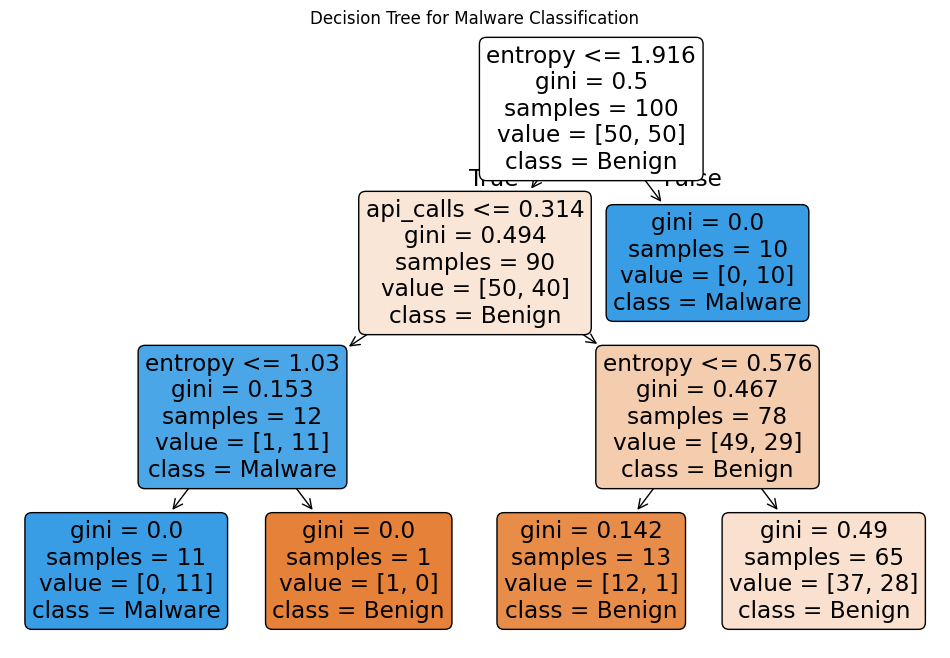

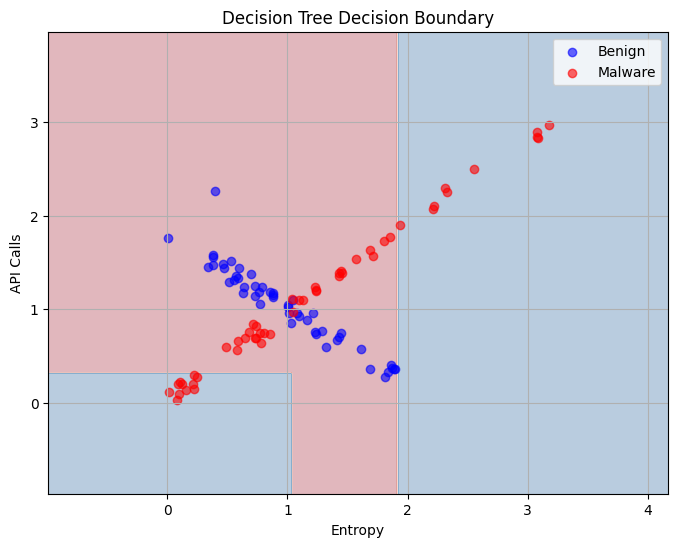

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification

# Tạo dữ liệu giả lập: 100 mẫu, 2 đặc trưng, 2 lớp
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Đặt tên đặc trưng
feature_names = ['entropy', 'api_calls']
X = np.abs(X)  # Đảm bảo giá trị không âm (giống thực tế)

# Huấn luyện Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)

# Visualization 1: Sơ đồ cây
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, class_names=['Benign', 'Malware'], filled=True, rounded=True)
plt.title('Decision Tree for Malware Classification')
plt.show()

# Visualization 2: Ranh giới quyết định
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Bước lưới
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Benign', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Malware', alpha=0.6)
    plt.xlabel('Entropy')
    plt.ylabel('API Calls')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(dt, X, y, 'Decision Tree Decision Boundary')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Dữ liệu (chỉ dùng Entropy và API Calls để vẽ 2D)
X = np.array([
    [2.5, 5],   # T1
    [3.8, 15],  # T2
    [3.2, 10],  # T3
    [2.8, 7],   # T4
    [4.0, 20]   # T5
])
y = np.array([0, 1, 1, 0, 1])  # Nhãn: 0 = benign, 1 = malware
new_point = np.array([[3.5, 12]])  # Tệp mới
feature_names = ['Entropy', 'API Calls']

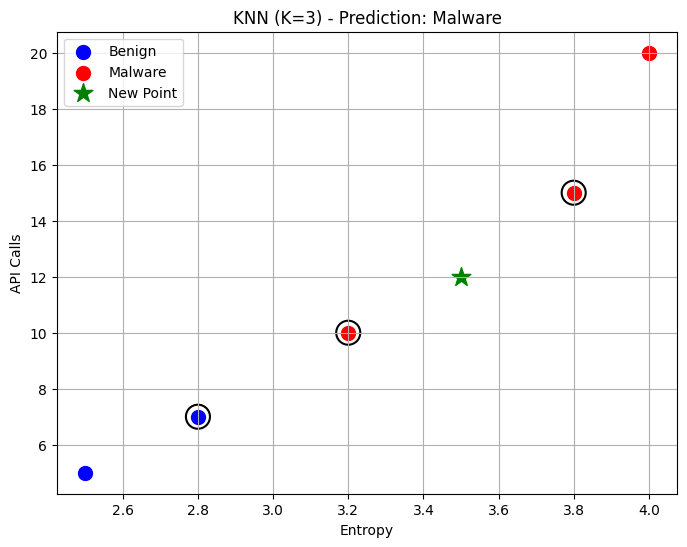

In [12]:
# Huấn luyện KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
prediction = knn.predict(new_point)
neighbors = knn.kneighbors(new_point, return_distance=False)[0]

# Vẽ
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Benign', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Malware', s=100)
plt.scatter(new_point[0, 0], new_point[0, 1], c='green', marker='*', s=200, label='New Point')

# Khoanh tròn 3 hàng xóm gần nhất
for idx in neighbors:
    plt.scatter(X[idx, 0], X[idx, 1], c='none', edgecolor='black', s=300, linewidth=1.5)

plt.xlabel('Entropy')
plt.ylabel('API Calls')
plt.title(f'KNN (K=3) - Prediction: {"Malware" if prediction[0] == 1 else "Benign"}')
plt.legend()
plt.grid(True)
plt.show()

Dự đoán cho F_new:
k-NN: Benign
Decision Tree: Benign
Random Forest: Benign


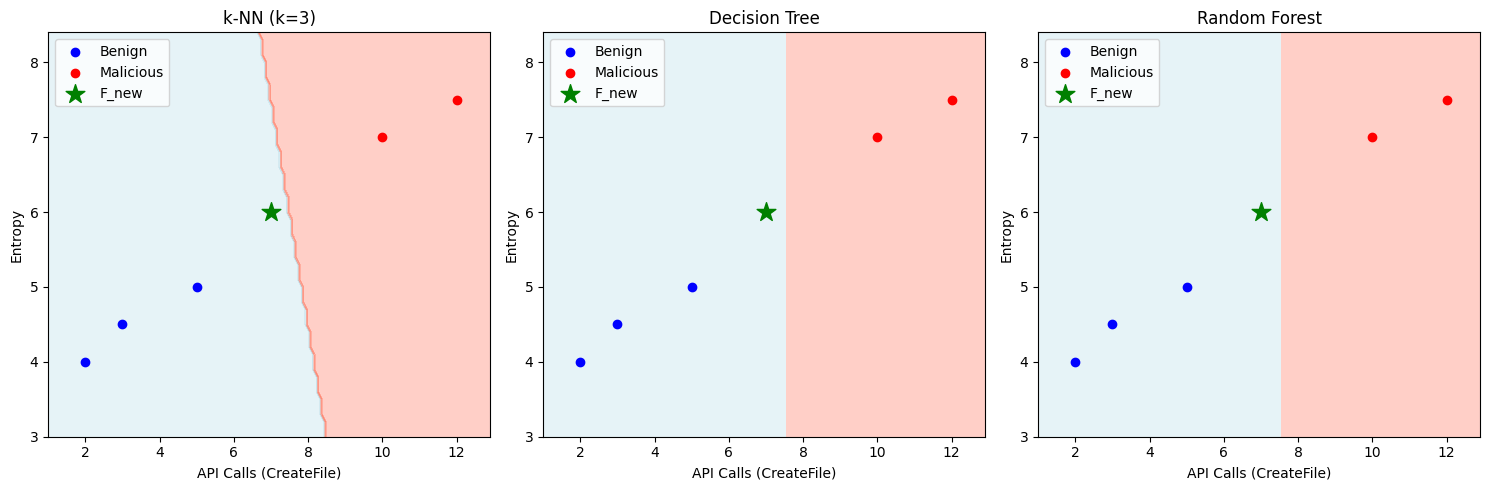

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

# Tạo dataset
data = {
    'File': ['F1', 'F2', 'F3', 'F4', 'F5', 'F_new'],
    'API_Calls_CreateFile': [2, 3, 10, 12, 5, 7],
    'Entropy': [4.0, 4.5, 7.0, 7.5, 5.0, 6.0],
    'Class': ['Benign', 'Benign', 'Malicious', 'Malicious', 'Benign', 'Unknown']
}

df = pd.DataFrame(data)

# Tách dữ liệu huấn luyện và điểm mới
X_train = df[df['Class'] != 'Unknown'][['API_Calls_CreateFile', 'Entropy']].values
y_train = df[df['Class'] != 'Unknown']['Class'].values
X_new = df[df['Class'] == 'Unknown'][['API_Calls_CreateFile', 'Entropy']].values

# Khởi tạo các mô hình
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Huấn luyện các mô hình
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Dự đoán cho F_new
print("Dự đoán cho F_new:")
print(f"k-NN: {knn.predict(X_new)[0]}")
print(f"Decision Tree: {dt.predict(X_new)[0]}")
print(f"Random Forest: {rf.predict(X_new)[0]}")

# Trực quan hóa ranh giới quyết định
def plot_decision_boundary(model, X, y, title):
    h = 0.1  # Bước lưới
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z == 'Benign', 0, 1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#ADD8E6', '#FF6347']), alpha=0.3)
    plt.scatter(X[y == 'Benign', 0], X[y == 'Benign', 1], c='blue', label='Benign', marker='o')
    plt.scatter(X[y == 'Malicious', 0], X[y == 'Malicious', 1], c='red', label='Malicious', marker='o')
    plt.scatter(X_new[:, 0], X_new[:, 1], c='green', label='F_new', marker='*', s=200)
    plt.xlabel('API Calls (CreateFile)')
    plt.ylabel('Entropy')
    plt.title(title)
    plt.legend()

# Vẽ biểu đồ cho từng mô hình
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(knn, X_train, y_train, 'k-NN (k=3)')

plt.subplot(1, 3, 2)
plot_decision_boundary(dt, X_train, y_train, 'Decision Tree')

plt.subplot(1, 3, 3)
plot_decision_boundary(rf, X_train, y_train, 'Random Forest')

plt.tight_layout()
plt.show()

Dự đoán cho F_new:
k-NN (Ball Tree): Benign
k-NN (KD Tree): Benign
k-NN (Brute Force): Benign
Decision Tree: Benign
Random Forest: Benign


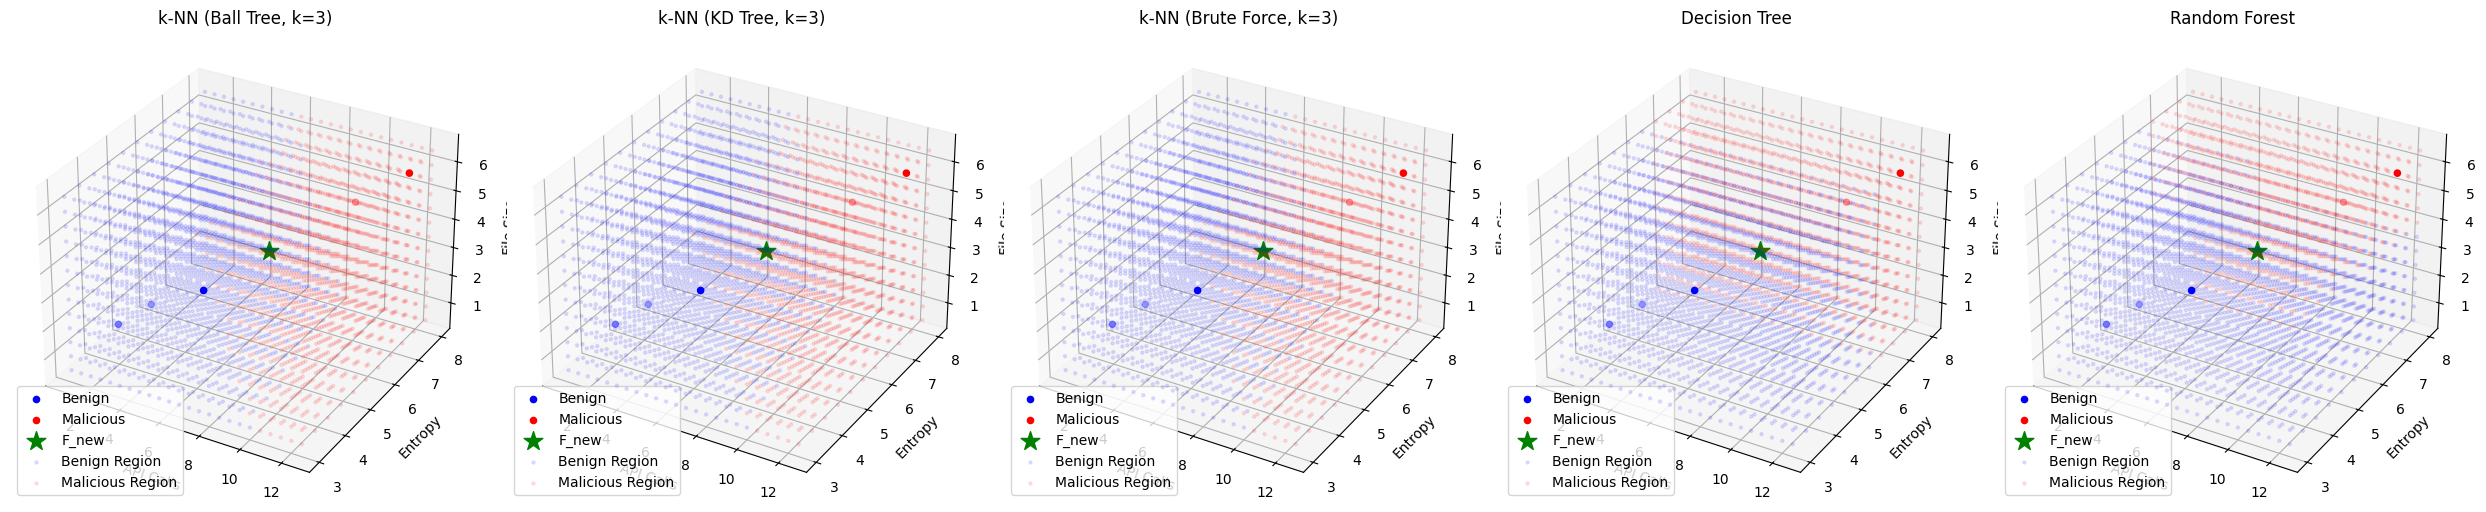

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tạo dataset
data = {
    'File': ['F1', 'F2', 'F3', 'F4', 'F5', 'F_new'],
    'API_Calls_CreateFile': [2, 3, 10, 12, 5, 7],
    'Entropy': [4.0, 4.5, 7.0, 7.5, 5.0, 6.0],
    'File_Size': [1.5, 2.0, 5.0, 6.0, 2.5, 3.5],
    'Class': ['Benign', 'Benign', 'Malicious', 'Malicious', 'Benign', 'Unknown']
}

df = pd.DataFrame(data)

# Tách dữ liệu huấn luyện và điểm mới
X_train = df[df['Class'] != 'Unknown'][['API_Calls_CreateFile', 'Entropy', 'File_Size']].values
y_train = df[df['Class'] != 'Unknown']['Class'].values
X_new = df[df['Class'] == 'Unknown'][['API_Calls_CreateFile', 'Entropy', 'File_Size']].values

# Khởi tạo các mô hình
knn_ball = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn_kd = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_brute = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Huấn luyện các mô hình
knn_ball.fit(X_train, y_train)
knn_kd.fit(X_train, y_train)
knn_brute.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Dự đoán cho F_new
print("Dự đoán cho F_new:")
print(f"k-NN (Ball Tree): {knn_ball.predict(X_new)[0]}")
print(f"k-NN (KD Tree): {knn_kd.predict(X_new)[0]}")
print(f"k-NN (Brute Force): {knn_brute.predict(X_new)[0]}")
print(f"Decision Tree: {dt.predict(X_new)[0]}")
print(f"Random Forest: {rf.predict(X_new)[0]}")

# Tạo lưới 3D để vẽ ranh giới quyết định
h = 0.5  # Bước lưới
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
z_min, z_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
xx, yy, zz = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h),
    np.arange(z_min, z_max, h)
)

# Dự đoán trên lưới 3D cho từng mô hình
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z_ball = knn_ball.predict(grid_points)
Z_kd = knn_kd.predict(grid_points)
Z_brute = knn_brute.predict(grid_points)
Z_dt = dt.predict(grid_points)
Z_rf = rf.predict(grid_points)

# Chuyển nhãn thành số để vẽ
Z_ball = np.where(Z_ball == 'Benign', 0, 1)
Z_kd = np.where(Z_kd == 'Benign', 0, 1)
Z_brute = np.where(Z_brute == 'Benign', 0, 1)
Z_dt = np.where(Z_dt == 'Benign', 0, 1)
Z_rf = np.where(Z_rf == 'Benign', 0, 1)

# Tạo figure
fig = plt.figure(figsize=(25, 5))

# Hàm vẽ 3D
def plot_3d_boundary(ax, Z, title):
    ax.scatter(X_train[y_train == 'Benign', 0], X_train[y_train == 'Benign', 1], X_train[y_train == 'Benign', 2], 
               c='blue', label='Benign', marker='o')
    ax.scatter(X_train[y_train == 'Malicious', 0], X_train[y_train == 'Malicious', 1], X_train[y_train == 'Malicious', 2], 
               c='red', label='Malicious', marker='o')
    ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c='green', label='F_new', marker='*', s=200)
    # Vẽ lưới ranh giới quyết định
    ax.scatter(grid_points[Z == 0, 0], grid_points[Z == 0, 1], grid_points[Z == 0, 2], 
               c='blue', alpha=0.1, marker='.', label='Benign Region')
    ax.scatter(grid_points[Z == 1, 0], grid_points[Z == 1, 1], grid_points[Z == 1, 2], 
               c='red', alpha=0.1, marker='.', label='Malicious Region')
    ax.set_xlabel('API Calls')
    ax.set_ylabel('Entropy')
    ax.set_zlabel('File Size')
    ax.set_title(title)
    ax.legend()

# 1. k-NN (Ball Tree)
ax1 = fig.add_subplot(151, projection='3d')
plot_3d_boundary(ax1, Z_ball, 'k-NN (Ball Tree, k=3)')

# 2. k-NN (KD Tree)
ax2 = fig.add_subplot(152, projection='3d')
plot_3d_boundary(ax2, Z_kd, 'k-NN (KD Tree, k=3)')

# 3. k-NN (Brute Force)
ax3 = fig.add_subplot(153, projection='3d')
plot_3d_boundary(ax3, Z_brute, 'k-NN (Brute Force, k=3)')

# 4. Decision Tree
ax4 = fig.add_subplot(154, projection='3d')
plot_3d_boundary(ax4, Z_dt, 'Decision Tree')

# 5. Random Forest
ax5 = fig.add_subplot(155, projection='3d')
plot_3d_boundary(ax5, Z_rf, 'Random Forest')

plt.tight_layout()
plt.show()